<a href="https://www.kaggle.com/code/eavprog/tr-portf-start-sigmoid?scriptVersionId=101378415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Пробуем делать портфель (sigmoid)

Корректируем ядро предиктора.
Гоняем симуляцию.

# Библиотеки

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

# Загрузка данных

In [2]:
data = pd.read_csv('../input/accii-53/close_data.csv',index_col='Date')
data

,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,...,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-09,43.320000,6.950000,57.520924,28.000000,0.8499,1.7180,0.22360,10.950000,154.500000,0.8260,...,434.210541,0.006830,0.002550,0.004420,0.004530,0.00106,91.839996,0.16878,20.180000,0.055379
2012-07-10,43.529999,7.203000,57.038136,28.450001,0.8400,1.7467,0.23334,11.073000,155.350006,0.8536,...,446.421051,0.006870,0.002550,0.004430,0.004590,0.00108,93.389999,0.16876,20.332001,0.056173
2012-07-11,43.490002,7.005000,56.910049,27.129999,0.8400,1.7797,0.23871,11.190000,153.550003,0.8748,...,443.157898,0.006780,0.002550,0.004370,0.004500,0.00108,91.690002,0.16877,20.268999,0.054673
2012-07-12,42.990002,6.960000,56.722843,26.500000,0.8200,1.7718,0.22705,11.181000,152.149994,0.8531,...,466.105255,0.006690,0.002550,0.004310,0.004300,0.00107,92.000000,0.16789,20.235001,0.053301
2012-07-13,43.500000,7.243000,58.181065,26.990000,0.8086,1.7718,0.23047,11.087000,153.160004,0.8543,...,459.789459,0.006760,0.002550,0.004440,0.004500,0.00107,96.459999,0.16875,20.107000,0.053977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,26.820000,21.299999,71.349998,314.000000,0.9700,0.4930,0.09122,31.530001,296.000000,0.8020,...,170.000000,0.009370,0.003895,0.012195,0.008535,0.00260,57.779999,0.48300,6.700000,0.018600
2022-06-27,27.900000,21.715000,75.000000,314.000000,0.9700,0.5060,0.09360,31.549999,296.200012,0.8099,...,183.000000,0.009574,0.003920,0.012185,0.008525,0.00260,57.020000,0.50450,7.000000,0.019100
2022-06-30,26.680000,20.100000,75.400002,314.000000,0.9120,0.4816,0.09026,30.000000,207.000000,0.7846,...,172.000000,0.009026,0.003690,0.012220,0.008840,0.00254,55.720001,0.48050,6.940000,0.017780


# Изменение 

In [3]:
d_data = data.pct_change()
d_data

,AFLT.ME,AMEZ.ME,BSPB.ME,CHEP.ME,DVEC.ME,ENRU.ME,FEES.ME,FESH.ME,GAZP.ME,HYDR.ME,...,SVAV.ME,TGKA.ME,TGKB.ME,TGKD.ME,TGKDP.ME,TGKN.ME,TRMK.ME,TTLK.ME,UTAR.ME,VTBR.ME
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-10,0.004848,0.036403,-0.008393,0.016071,-0.011648,0.016705,0.043560,0.011233,0.005502,0.033414,...,0.028121,0.005857,0.000000,0.002262,0.013245,0.018868,0.016877,-0.000118,0.007532,0.014338
2012-07-11,-0.000919,-0.027489,-0.002246,-0.046397,0.000000,0.018893,0.023014,0.010566,-0.011587,0.024836,...,-0.007310,-0.013100,0.000000,-0.013544,-0.019608,0.000000,-0.018203,0.000059,-0.003099,-0.026703
2012-07-12,-0.011497,-0.006424,-0.003290,-0.023221,-0.023810,-0.004439,-0.048846,-0.000804,-0.009118,-0.024806,...,0.051781,-0.013274,0.000000,-0.013730,-0.044444,-0.009259,0.003381,-0.005214,-0.001677,-0.025095
2012-07-13,0.011863,0.040661,0.025708,0.018491,-0.013902,0.000000,0.015063,-0.008407,0.006638,0.001407,...,-0.013550,0.010463,0.000000,0.030162,0.046512,0.000000,0.048478,0.005122,-0.006326,0.012683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.017451,0.088679,0.076981,0.000000,0.010417,0.022822,0.081318,0.011874,-0.034258,-0.005580,...,-0.017341,0.059955,0.067123,0.054019,0.066875,-0.022556,0.150538,0.059211,0.006006,0.092190
2022-06-27,0.040268,0.019484,0.051156,0.000000,0.000000,0.026369,0.026091,0.000634,0.000676,0.009850,...,0.076471,0.021772,0.006418,-0.000820,-0.001172,0.000000,-0.013153,0.044513,0.044776,0.026882
2022-06-30,-0.043728,-0.074373,0.005333,0.000000,-0.059794,-0.048221,-0.035684,-0.049128,-0.301148,-0.031238,...,-0.060109,-0.057238,-0.058673,0.002872,0.036950,-0.023077,-0.022799,-0.047572,-0.008571,-0.069110


# Симуляция

2012-07-09
2012-09-17
2012-11-27
2013-02-13
2013-04-25
2013-07-09


2022-07-21 06:58:47.959609: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-21 06:58:48.162384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2013-09-17
2013-11-27
2014-02-12
2014-04-24
2014-07-10
2014-09-18
2014-12-01
2015-02-13
2015-04-28
2015-07-10
2015-09-18
2015-11-30
2016-02-11
2016-04-25
2016-07-08
2016-09-16
2016-11-28
2017-02-07
2017-04-20
2017-07-05
2017-09-13
2017-11-23
2018-02-06
2018-04-19
2018-07-03
2018-09-11
2018-11-21
2019-02-05
2019-04-17
2019-07-01
2019-09-09
2019-11-19
2020-02-03
2020-04-15
2020-06-30
2020-09-09
2020-11-19
2021-02-02
2021-04-15
2021-06-25
2021-09-03
2021-11-15
2022-01-26
2022-05-05


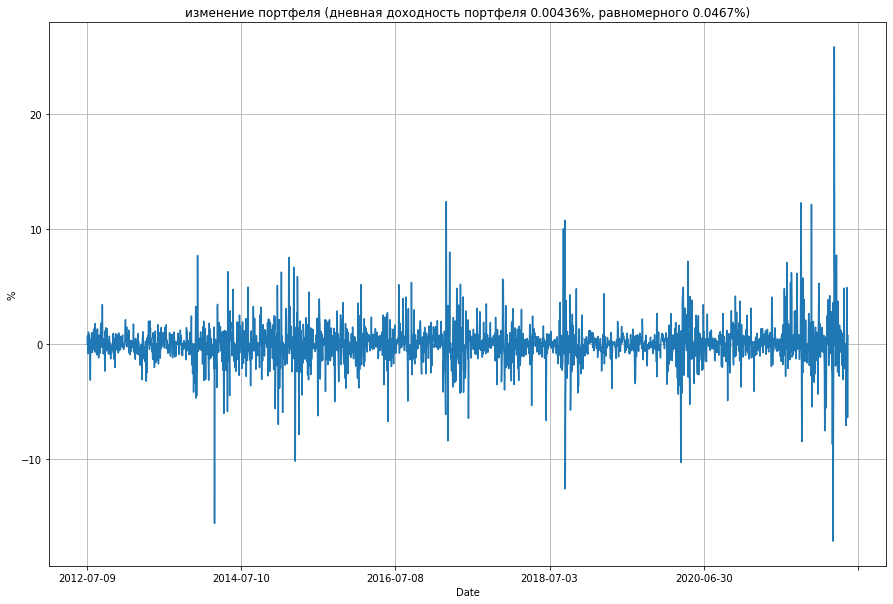

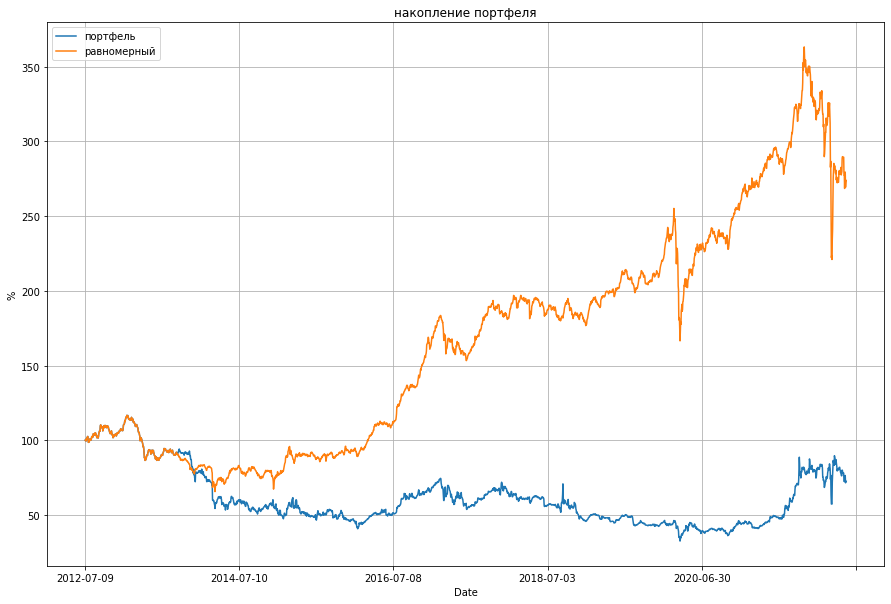

In [4]:
res = d_data.iloc[:,0].copy()
res[:] = 0

def custom_loss(y_true, y_pred):
    global y_t, y_p
#     y_t, y_p = y_true.eval() , y_pred.eval()
    
    return tf.math.exp( -tf.math.reduce_mean(y_true * y_pred)*y_true.shape[1] )

model = None

def get_distr(d_inp):
    distr = np.random.randn(d_inp.shape[1])
    distr = np.exp(distr)/sum(np.exp(distr))
    
    global model, inps, outs, inps_learn, outs_learn, pred
    
    if d_inp.shape[0] % 5 == 0:
        # print("model = None")
        model = None
    
    if d_inp.shape[0] < 300:
        distr = np.ones_like(distr) / len(distr)
    else:
        # разделение выборок
        inps = pd.concat([d_inp.shift(n) for n in range(20)],axis=1) # входы
        # outs = pd.concat([d_inp.shift(-n) for n in range(5)],axis=1) # выходы
        outs = d_inp.shift(-1)
        
        # ограничение размера обучающей выборки
        inps = inps.iloc[-300:,:]
        outs = outs.iloc[-300:,:]
        
        # выделяем непустые строки для обучения
        ind = (inps.isna().sum(axis=1) == 0) & (outs.isna().sum(axis=1) == 0)
        inps_learn = inps[ind]
        outs_learn = outs[ind]
        
        if model is None:
            # создание модели
            model = tf.keras.models.Sequential([
                layers.Dense(128, activation=tf.keras.activations.sigmoid,input_shape=(inps.shape[1],)),
                layers.Dense(d_inp.shape[1],activation=tf.keras.activations.softmax)
            ])

            model.compile(optimizer="adam",loss=custom_loss)

            # обучение модели
            model.fit(inps_learn,outs_learn, 
                      epochs=1000, 
                      verbose = False, 
                      validation_split = 0.2, 
                      use_multiprocessing=True, 
                      shuffle=False,
                      callbacks=tf.keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True,verbose=False))
            
            # print("model fited")
            
        # генерация прогноза
        
        distr = model.predict(inps.iloc[[-1],:])[0]
        
        # raise 0
        
        # pass

    return distr    

for n in range(len(res)):
    before = d_data.iloc[:n,:].copy()
    distr = get_distr(before)
    res.iloc[n] = (d_data.iloc[n,:] * distr).sum()
    if n % 50 == 0:
        print(res.index[n])


d_data_avg = d_data.fillna(0).mean(axis=1).mean()*100
d_portf_avg = res.mean()*100
(res*100).plot(title=f"изменение портфеля (дневная доходность портфеля {d_portf_avg:.3}%, равномерного {d_data_avg:.3}%)",
         figsize=(15,10),grid=True,ylabel='%')

plt.figure(figsize=(15,10))
((res+1).cumprod()*100).plot(label='портфель')
((d_data.fillna(0).mean(axis=1)+1).cumprod()*100).plot(label='равномерный')
plt.title('накопление портфеля')
plt.grid()
plt.ylabel('%')
plt.legend()
plt.show()